Héctor Asorey de Pablos

# VISUALIZACIÓN DE DATOS - PROYECTO PYTHON

Para esta práctica, se van a analizar datos relativos a las ventas de videojuegos y datos relativos a las notas que tanto críticos como usuarios otorgan a distintos videojuegos.

Los datasets son los siguientes:

Dataset sobre ventas de videojuegos ---> https://www.kaggle.com/datasets/gregorut/videogamesales

* Contiene 16598 datos acerca de las ventas de algunos videojuegos
* Contiene las siguientes columnas:
    * Rank: índice que marca las ventas generales. Así, el juego más vendido en este dataset contendrá un rank = 1
    * Name: el nombre del videojuego
    * Platform: la plataforma (consola o PC) en la cual fue lanzada el videojuego
    * Year: el año en el que se lanzó el juego
    * Publisher: el distribuidor que publicó el juego
    * NA_Sales: el total de ventas en Norte América en millones
    * EU_Sales: el total de ventas en Europa en millones
    * JP_Sales: el total de ventas en Japón en millones
    * Other_Sales: el total de ventas en el resto de regiones en millones
    * Global_Sales: el total de ventas en todas las regiones combinadas en millones
   
Dataset sobre notas de videojuegos ---> https://www.kaggle.com/datasets/gregorut/videogamesales

* Contiene 18880 datos acerca de las notas otorgadas a distintos videojuegos
* Contiene las siguientes columnas:
    * name: el nombre del videojuego
    * platform: la plataforma (consola o PC) donde se lanzó el videojuego
    * release_date: la fecha de lanzamiento del videojuego
    * meta_score: la nota general otorgada por la prensa en Metacritic https://www.metacritic.com/browse/games/score/metascore/all/all/filtered?page=0
    * user_review: la nota general otorgada por los usuarios en Metacritic

### Instalar (si fuera necesario) e importar librerías

In [1]:
#pip install pandas
#pip install matplotlib
#pip install numpy
#pip install scipy
#pip install plotly
#pip install cufflinks
#pip install chart_studio
#pip install ipywidgets
#pip install requests

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import scipy
import plotly

import chart_studio
import ipywidgets
import requests
import io

import os
from IPython.display import Image, display, HTML

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Lectura de los datos a utilizar

In [3]:
file = "ProyectoPythonDatasets/sales.csv"
dfSales = pd.read_csv(file)
dfSales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
url = "https://raw.githubusercontent.com/Hertorias/INSO4-VisualizacionDatos/main/ProyectoPythonDatasets/reviews.csv"
dfReviews = pd.read_csv(url)
dfReviews.head(5)

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


### Preprocesamiento de los datos

El dataset que contiene las reviews sobre videojuegos, tiene en distinta escala las notas de la crítica (meta_score) que las notas de los usuarios ('user_score'). Además, mientras que el meta_score es de tipo numérico, el user_review es de tipo object. Por ello, se va a transformar la columna de user_review a numérica primero.

Como hay user_reviews con el valor 'tbd', se va a parsear a numérico con el argumento "errors = 'coerce'". Así, aquellos datos que no pueda convertir a numérico, los marcará como NA, y después se eliminarán estos NA.

In [5]:
dfReviews['user_review'] = pd.to_numeric(dfReviews['user_review'], errors = 'coerce')
dfReviews.dropna(subset=['user_review'], inplace=True)

Tras tener la columna user_review en formato numérico, se multiplican por diez para que estén en la misma escala que el meta_score.

In [6]:
dfReviews['user_review'] = list(map(lambda x: x*10, dfReviews['user_review']))

Además, de la fecha solo se utilizarán los años, por lo que se creará una columna que contenga únicamente el año.

In [7]:
dfReviews['year'] = list(map(lambda x: int(x.split(', ')[1]), dfReviews['release_date']))
dfReviews['year_time_format'] = pd.to_datetime(dfReviews['year'], format='%Y')

In [8]:
dfReviews.head(3)

,name,platform,release_date,summary,meta_score,user_review,year,year_time_format
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,91.0,1998,1998-01-01
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,74.0,2000,2000-01-01
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,77.0,2008,2008-01-01


# Los 10 juegos más vendidos por plataforma globalmente y en cada región principal

El objetivo de este apartado es poder mostrar de forma interactiva qué juegos fueron los más vendidos de forma global, y ofrecer también lo mismo para las tres regiones principales (Norte América, Europa y Japón).

Primero, se creará un dataset que sólo contenga los diez juegos más vendidos globalmente ordenados de más a menos vendidos.

In [9]:
top_10_by_platform = dfSales.groupby('Platform').apply(lambda x: x.sort_values('Global_Sales', ascending=False).head(10))
top_10_by_platform.reset_index(drop=True, inplace=True)

top_10_by_platform.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81
1,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.0,0.05,4.50
2,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
3,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
4,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
5,736,Frogger,2600,1981.0,Action,Parker Bros.,2.06,0.12,0.0,0.02,2.20
6,768,Demon Attack,2600,1981.0,Shooter,Imagic,1.99,0.12,0.0,0.02,2.13
7,866,E.T.: The Extra Terrestrial,2600,1981.0,Action,Atari,1.84,0.11,0.0,0.02,1.97
8,1108,Ms. Pac-Man,2600,1981.0,Puzzle,Atari,1.54,0.10,0.0,0.02,1.65
9,1117,Dig Dug,2600,1982.0,Puzzle,Atari,1.52,0.10,0.0,0.02,1.64


Primero, un gráfico que muestra los 10 videojuegos más vendidos globalmente para la plataforma escogida.

In [10]:
@interact
def plot_classification(platform=list(top_10_by_platform["Platform"].unique())):
    
    condition = top_10_by_platform["Platform"] == platform
    top_10_by_platform_filtered=top_10_by_platform[condition]
    top_10_by_platform_filtered = top_10_by_platform_filtered.loc[:, ['Name', 'Global_Sales']]

    display(HTML(f'<h3> Top 10 videojuegos más vendidos para {platform} globalmente <h3>'))
    if len(top_10_by_platform_filtered)!=0:
        fig, ax = plt.subplots(figsize=(12, 8))
        top_10_by_platform_filtered.plot.bar(x="Name", y="Global_Sales", ax = ax) 
        ax.set_title(f'Top 10 juegos para {platform}')
        ax.set_xlabel('Videojuegos')
        ax.set_ylabel('Ventas (en millones)')
        _=plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    else:
        print("No data available")

interactive(children=(Dropdown(description='platform', options=('2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA',…

In [11]:
columnToChoose = ["NA_Sales", "EU_Sales", "JP_Sales"]

En segundo lugar, el gráfico que muestra los 10 videojuegos más vendidos para la región y plataforma escogidas.

In [12]:
@interact
def plot_classification(platform=list(top_10_by_platform["Platform"].unique()), region=columnToChoose):
    
    condition = top_10_by_platform["Platform"] == platform
    top_10_in_region = dfSales.groupby('Platform').apply(lambda x: x.sort_values(region, ascending=False).head(10))
    top_10_in_region.reset_index(drop=True, inplace=True)
    top_10_in_region_filtered = top_10_in_region[condition]
    top_10_in_region = top_10_in_region_filtered.loc[:, ['Name', region]]

    if region == "NA_Sales":
        color = "#3D7ED9"
        regionEsp = "Norte América"
    elif region == "EU_Sales":
        color = "#DB4735"
        regionEsp = "Europa"
    else:
        color = "#56DB5F"
        regionEsp = "Japón"

    display(HTML(f'<h3> Top 10 videojuegos más vendidos para {platform} en {regionEsp} <h3>'))
    if len(top_10_in_region_filtered)!=0:
        fig, ax = plt.subplots(figsize=(12, 8))
        top_10_in_region_filtered.plot.bar(x="Name", y=region, color=color, ax = ax) 
        ax.set_title(f'Top 10 juegos para {platform}')
        ax.set_xlabel('Videojuegos')
        ax.set_ylabel('Ventas (en millones)')
        _=plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    else:
        print("No data available")

interactive(children=(Dropdown(description='platform', options=('2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA',…

# Cuántas ventas hubó por año globalmente y en las regiones principales

El objetivo de este apartado es mostrar una evolución de las ventas de videojuegos con los años. Este dataset tiene el problema de que a partir del 2010 contiene menos información.

Se creará una copia del dataset de ventas original donde no haya datos con valor NA en la fecha de lanzamiento.

In [13]:
dfYearClean = dfSales.copy()
dfYearClean.dropna(subset=['Year'], inplace=True)

Se agrupan los datos en función del año y se hace la suma de las ventas globales por año.

In [14]:
dfSalesByYear = dfYearClean.groupby('Year')['Global_Sales'].sum().reset_index()
dfSalesByYear = dfSalesByYear.rename(columns={"Global_Sales": "Global Sales in Millions"})

Gráfico que muestra la evolución de las ventas de manera global anualmente.

Se pueden seleccionar los años que se quieren ver mediante el slider.

In [15]:
import plotly.express as px
from IPython.display import HTML

fig = px.line(dfSalesByYear, x=dfSalesByYear['Year'],y=dfSalesByYear['Global Sales in Millions'], title='Evolución de los ingresos generados en función del año globalmente')
fig.update_xaxes(rangeslider_visible=True)

Se crea también un dataset como dfSalesByYear, sólo que ahora contendrá la suma de las ventas para cada región principal por año

In [16]:
dfSalesByYear2 = dfYearClean.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum().reset_index()
dfSalesByYear2 = dfSalesByYear2.rename(columns={"NA_Sales": "North America Sales in Millions"})
dfSalesByYear2 = dfSalesByYear2.rename(columns={"EU_Sales": "Europe Sales in Millions"})
dfSalesByYear2 = dfSalesByYear2.rename(columns={"JP_Sales": "Japan Sales in Millions"})

Gráfico que muestra la evolución de las ventas para las tres regiones principales anualmente.

Se pueden seleccionar los años que se quieren ver mediante el slider

In [17]:
fig = px.line(dfSalesByYear2, x='Year', y=['North America Sales in Millions', 'Europe Sales in Millions', 'Japan Sales in Millions'], title='Evolución de los ingresos generados en función del año por región')
fig.update_xaxes(rangeslider_visible=True)

# ¿Qué géneros de videojuegos predominan en las distintas plataformas?

El objetivo de este apartado es mostrar la proporción de géneros de videojuegos en las distintas plataformas. Con ello, se puede perfilar el tipo de usuario al que está dirigido cada plataforma.

Gráfico que muestra la proporción de los géneros a los que pertenecen los videojuegos para la plataforma escogida.

In [18]:
@interact
def show_dataframe_filtered(platform=list(dfSales["Platform"].unique())):

    condition1 = dfSales["Platform"] == platform
    dfSalesGenreFiltered=dfSales.loc[condition1, ['Name', 'Platform', 'Year', 'Genre']].reset_index(drop=True)
                            
    dataToPlot = dfSalesGenreFiltered['Genre'].value_counts()
    labels = list(dataToPlot.index)
    
    fig, ax = plt.subplots(figsize = (12,9))
    ax.pie(dataToPlot, labels=labels)
    ax.set_title(f'Géneros a los que pertenecen los videojuegos de {platform}')


    center_circle = plt.Circle((0,0), 0.7, color='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)    

interactive(children=(Dropdown(description='platform', options=('Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2'…

# Notas prensa VS Notas usuarios

El objetivo de este apartado es ver cuánto concuerdan los usuarios y las críticas en valoraciones de los distintos videojuegos.

Este primer gráfico muestra en un scatter plot los distintos videojuegos en función de la nota de los críticos y de los usuarios.

In [19]:
import bokeh as bk
from bokeh.plotting import figure, show
from bokeh.plotting import output_file
from bokeh.models import HoverTool

from bokeh.io import show, output_notebook
output_notebook()

x = dfReviews['meta_score']
y = dfReviews['user_review']
radii = 0.5
colors = ["#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)]

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"
hover = HoverTool(tooltips=[("Meta Score", "@x"), ("User Review", "@y")])
p = figure(tools=[TOOLS, hover], x_range=(0, 100), y_range=(0, 100))
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

p.xaxis.axis_label = 'meta_score'
p.yaxis.axis_label = 'user_review'

show(p)

Loading BokehJS ...

GlyphRenderer(id='1043', ...)

Este segundo gráfico nos permite visualizar la evolución dentro de los videojuegos de una misma saga de las notas de prensa y usuarios.

Hay que introducir el nombre de la saga que se quiera visualizar.

Enter game name: Super Mario


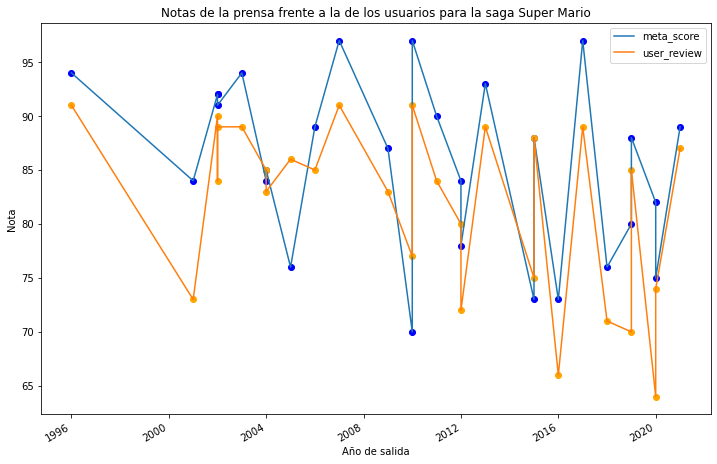

In [20]:
# Define a function to plot data based on input text
game = input("Enter game name: ")

def plot_classification(game):

    condition = dfReviews["name"].str.contains(game)
    dfReviewsFiltered = dfReviews[condition]
    dfReviewsFiltered.drop_duplicates(subset='name', keep='first', inplace=True)
    dfReviewsFiltered = dfReviewsFiltered.loc[:, ['year', 'year_time_format', 'meta_score', 'user_review']]

    display(HTML(f'<h3> Evolución de las notas de la prensa frente a la de los usuarios para la saga {game} <h3>'))
    if len(dfReviewsFiltered) != 0:
        fig, ax = plt.subplots(figsize=(12, 8))
        dfReviewsFiltered.plot(x="year_time_format", y=["meta_score", "user_review"], ax = ax)
        ax.set_title(f'Notas de la prensa frente a la de los usuarios para la saga {game}')
        ax.set_xlabel('Año de salida')
        ax.scatter(dfReviewsFiltered["year_time_format"], dfReviewsFiltered["meta_score"], c="blue", label="meta_score")
        ax.scatter(dfReviewsFiltered["year_time_format"], dfReviewsFiltered["user_review"], c="orange", label="user_review")
        ax.set_ylabel('Nota')
    else:
        print("No se han encontrado datos para representar")
        
plot_classification(game)

### Bibliografía

* https://stackoverflow.com/questions/24131501/x-and-y-axis-labels-for-bokeh-figure

* https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

* https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/

* https://pandasguide.readthedocs.io/en/latest/

* https://realpython.com/lessons/adding-hover-actions/

* https://docs.bokeh.org/en/2.4.2/docs/user_guide/tools.html